# <center>DSA8023 Analytathon 1: Report on predicting EV Customers from Energia's electricity consumption data  </center>
### <center> Varun Suresh Kumar (40364111) <br/><br/> 31-05-2023</center>



## <a id='0' href="#0">Table of Contents:</a>

<a href="#intro">1. Introduction</a><br/>
<a href="#state">2. Statement of the problem</a><br/>
<a href="#obj">3. Research Objective</a><br/>
<a href="#overview">4. Data Overview</a><br/> 
    &emsp;&emsp;<a href="#4_1">4.1 Description of Variables </a><br/>
    &emsp;&emsp;<a href="#4_2">4.2 Exploratory Data Analysis</a><br/>
    &emsp;&emsp;<a href="#4_3">4.3 Measure of Association</a><br/>
    &emsp;&emsp;<a href="#4_4">4.4 Data wrangling</a><br/>
<a href="#method">5. Methodology</a><br/>
<a href="#comparison">6. Comparison of Modal performance</a><br/>
<a href="#results">7. Results and discussion</a><br/>
<a href="#conclusion">8. Conclusion</a><br/>
<a href="#references">9. References</a><br/>


## <a id='intro' href="#intro">Introduction</a>

Electric or hybrid vehicles will account for 20% of all new passenger vehicle sales by 2022, with over 70,000 EVs on the road in Ireland (ROI). As of Q1 2023, the proportion of new passenger autos acquired is growing rapidly (Prendergast, 2023). Energia accounts for 10% of all electric vehicle users. Finding the remaining suspected EV users who are not enrolled in Energia's EV Tariff is a challenge. In the existing database, only over 2,400 consumers have been identified as the EV Tariff consumers, indicating a considerable untapped market potential. The research on customer’s preference to choose alternative energy suppliers and spreading awareness on the customer benefits of Energia's EV Tariff, is crucial for Energia's market share growth.

Energia can construct prediction models using ML algorithms   that assess the likelihood of consumers acquiring an EV based on a variety of data points such as energy use trends, demographic information, and geographic location. These models can help Energia prioritise and target potential EV purchasers within its customer base who have not yet opted into the EV Tariff. By combining these ML predictions with additional sources of data, like vehicle registration databases and public charging station consumption data, Energia can improve the accuracy of identifying suspected EV customers.

This report will employ a number of research methodologies and analytical techniques to uncover an untapped market of prospective EV purchasers in Ireland. We will get valuable insights into the qualities, behaviour, and preferences of the target audience by examining customer data, conducting surveys, and researching market trends. These insights will assist Energia in developing data-driven strategies to meet the specific demands of the undiscovered niche, matching its offers to consumer expectations, and positioning itself as a leading provider in the EV energy market. By bridging the gap between recognised EV consumers and the untapped sector, Energia can contribute to the long-term growth of the EV industry, reduce carbon emissions, and pave the way for a greener, more environmentally conscious future.


## <a id='state' href="#state">Statement of the problem:</a>
Energia has the challenge of attracting and converting an underserved segment of Irish Electric Vehicle (EV) owners who have either chosen other suppliers or are ignorant of the benefits offered by Energia. Despite having attracted 10% of the targeted 70,000 EV clients, Energia's database only shows 2,400 EV Tariff users. The major goal is to break down this barrier by employing specialised approaches that successfully explain Energia's specific benefits, resulting in a greater adoption rate among the untapped EV owner market. Energia can strengthen its market position and become the preferred provider.


## <a id='obj' href="#obj">Research Objective:</a>

The objective of this study is to find non-Electric Vehicle (EV) consumers who have comparable socio-demographic profiles and monthly payment habits to existing EV users. The goal is to enhance the chance of these non-EV consumers adopting EVs by targeting them with targeted marketing campaigns and personalised solutions. Ultimately, this project will broaden Energia's client base, encourage sustainable mobility alternatives, and help to shape a better future.


## <a id='overview' href="#overview">Data overview:</a>

The provided dataset contains **1,86,558 observations** and **25 variables** related to customer information and their bi-monthly billing data over a two years. 

The variables are accountID, StartDate, ContractStartDateEV, contractStartDate, contractEndDate, saStatus, agedBand, signedUpGroup, title, mosaicType, EV, EV_New_or_Old, bill_1_2021, bill_2_2021, bill_3_2021, bill_4_2021, bill_5_2021, bill_6_2021, bill_1_2022, bill_2_2022, bill_3_2022, bill_4_2022, bill_5_2022, bill_6_2022, bill_1_2023. The **EV** variable is the target label.


## <a id='4_1' href="#4_1">Description of variables:</a>
<!-- - ***accountID***			: unique identifier for each account
- ***startDate***			: Start date of customer
- ***ContractStartDateEV***	: EV contract start date
- ***ContractStartDate***	: Energia contract start date
- ***ContractEndDate***		: Energia contract end date
- ***saStatus***			: Service status of customers
- ***agedBand***			: age band of customers
- ***signedUpGroup***		: customer’s channel of signup
- ***title***				: title of customer
- ***mosaicType***			: socio Economic class of customers
- ***EV*** (target label) 		: Whether customer has EV or not
- ***EV_New_or_Old***		: Is EV vehicle new or old
- ***Bill_1_2021*** to ***Bill_1_2023***	: Bi-billing information of customer
 -->
Table 1 shows the description of each variables with their missing values count and percentages. There are 13 billing variables *bill_1_2021* to *bill_1_2023* that represents the billing information of customers from January 2021 to January 2023. Based on the table below, *ContractStartDate* and *mosaicType* have a significant percentage of missing values in the dataset.

In [80]:
table_styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("color", 'black')])]

col_desc = ["Unique identifier for each account",
"Start date of customer",
"EV contract start date",
"Energia contract start date",
"Energia contract end date",
"Service status of customers",
"Age band of customers",
"Customer’s channel of signup",
"Title of the customer",
"Socio Economic class of customers",
"Whether customer has EV or not",
"Is EV vehicle new or old"]

temp1 = raw_d[['accountID', 'StartDate', 'ContractStartDateEV', 'contractStartDate',
       'contractEndDate', 'saStatus', 'agedBand', 'signedUpGroup', 'title',
       'mosaicType', 'EV', 'EV_New_or_Old']]

temp = pd.DataFrame({'Variable': temp1.count().index, 'Description': col_desc, 'No of Observations': temp1.count()})

# temp = temp.set_index('Variable')

temp['Missing data (count)'] = len(raw_d)  -  temp['No of Observations'] 

temp['Missing data (%)'] = round((len(raw_d)  -  temp['No of Observations'])*100 / len(raw_d), 2)

temp.sort_values(by="Missing data (count)", ascending=False).style.set_caption('Table 1.1 Missing values in the dataset (excluding bills)').set_table_styles(styles).hide(axis="index")

Variable,Description,No of Observations,Missing data (count),Missing data (%)
ContractStartDateEV,EV contract start date,2516,184042,98.650000
mosaicType,Socio Economic class of customers,144036,42522,22.790000
contractEndDate,Energia contract end date,185591,967,0.520000
contractStartDate,Energia contract start date,185981,577,0.310000
agedBand,Age band of customers,186552,6,0.000000
title,Title of the customer,186556,2,0.000000
accountID,Unique identifier for each account,186558,0,0.000000
StartDate,Start date of customer,186558,0,0.000000
saStatus,Service status of customers,186558,0,0.000000
signedUpGroup,Customer’s channel of signup,186558,0,0.000000


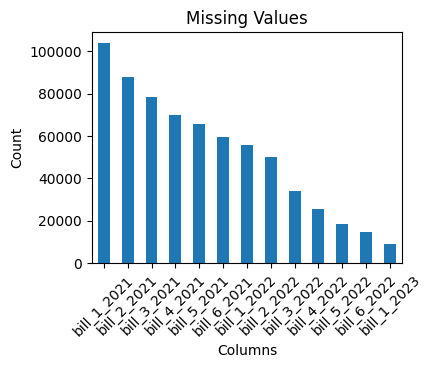

In [81]:
temp1 = raw_d[['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']]

missing_values = temp1.isin([0]).sum()


# Plotting the missing values
plt.figure(figsize=(4, 3))
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# helper functions

def visualizeFeatureCount(dataset, feature = 'EV', sizeX = 7, sizeY =7):
    totalData = len(dataset)
    hasFeature = dataset[feature].sum()
    hasNoFeature = totalData - hasFeature

    hasFeature_per = round(hasFeature/totalData * 100, 2)
    hasNoFeature_per = round(hasNoFeature/totalData * 100, 2)

    plt.figure(figsize=(sizeX,sizeY))
    sns.countplot(data = dataset, x=feature)
    plt.annotate('No {}: {}'.format(feature, hasNoFeature), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
    plt.annotate('{}: {}'.format(feature, hasFeature), xy=(0.7, 15000), xytext=(0.9, 3000), size=12)
    plt.annotate(str(hasNoFeature_per)+" %", xy=(-0.3, 15000), xytext=(-0.1, 20000), size=12)
    plt.annotate(str(hasFeature_per)+" %", xy=(0.7, 15000), xytext=(0.9, 20000), size=12)
    plt.show()

## <a id='references' href="#references">References:</a>

- Shane Prendergast, Direction of Travel - the growing EV markets in Ireland (26 April 2023) https://www.seai.ie/blog/ev-direction-of-travel/ [accessed 26 May 2023].




In [22]:

from IPython.display import HTML

HTML('''<script>
show=true; 
$('a').css({"text-decoration": "none"})
$('h2').css({"margin": '5px'})

function code_toggle() {
 if (show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 show = !show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code blocks."></form>''')